In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## **Data sampling**

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [121]:
raw_df=pd.read_csv('BCG_FEngg.csv')

In [122]:
df=raw_df.copy()

In [123]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [152]:
train_df = df.copy()

# Separate target variable from independent variables
X = df.drop(columns=['id', 'churn'])
y = df['churn']
print(X.shape)
print(y.shape)

(14605, 39)
(14605,)


In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 39)
(10953,)
(3652, 39)
(3652,)


## **Logistic Regression**

In [154]:
reg = 0.01
model_LR = LogisticRegression(C=1/reg, solver="liblinear")
model_LR.fit(X_train, y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [158]:
y_pred_LR = model_LR.predict(X_test)
y_scores_LR = model_LR.predict_proba(X_test)

Text(113.9222222222222, 0.5, 'Actual')

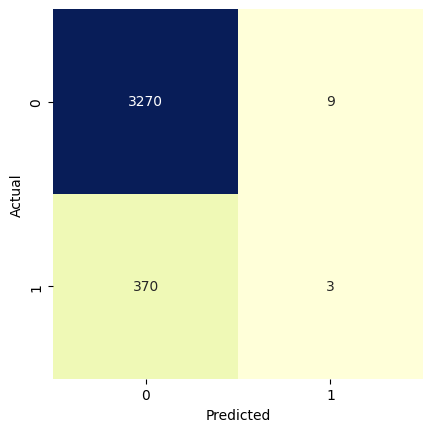

In [159]:
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

True positives: 3
False positives: 9
True negatives: 3270
False negatives: 370

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.25      0.01      0.02       373

    accuracy                           0.90      3652
   macro avg       0.57      0.50      0.48      3652
weighted avg       0.83      0.90      0.85      3652

Accuracy: 0.8962212486308871
Overall Precision: 0.25
Overall Recall: 0.00804289544235925

AUC: 0.6370321495061186


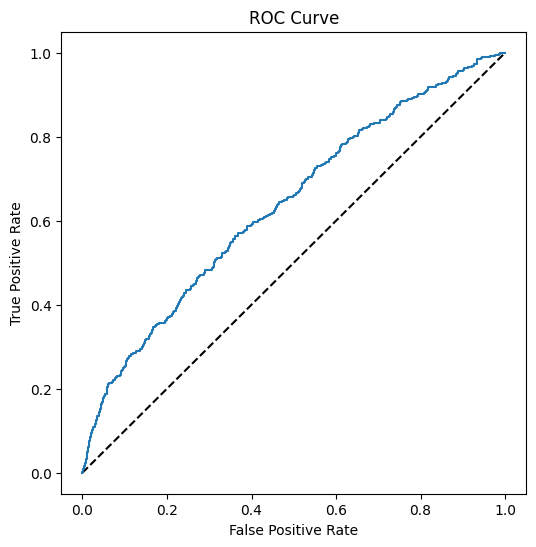

In [163]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_LR).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(classification_report(y_test, y_pred_LR))

print('Accuracy:', accuracy_score(y_test, y_pred_LR))
print("Overall Precision:",precision_score(y_test, y_pred_LR))
print("Overall Recall:",recall_score(y_test, y_pred_LR))
auc = roc_auc_score(y_test,y_scores_LR[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_scores_LR[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## **Random Forest**

In [165]:
model_RF = RandomForestClassifier(n_estimators = 100)
model_RF.fit(X_train, y_train)
print (model_RF)

RandomForestClassifier()


In [128]:
y_pred_RF = model_RF.predict(X_test)
y_test.value_counts()

churn
0    3279
1     373
Name: count, dtype: int64

Within the test set about 10% of the rows are churners (churn = 1).

In [135]:
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)

Text(113.9222222222222, 0.5, 'Actual')

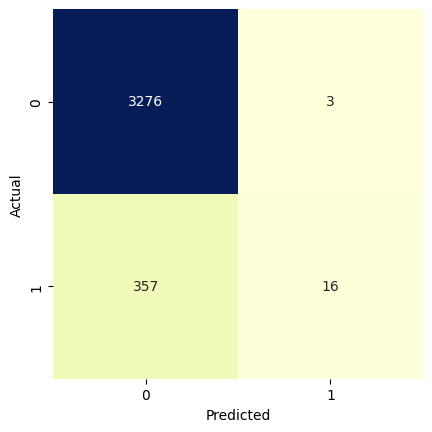

In [140]:
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')

True positives: 16
False positives: 3
True negatives: 3276
False negatives: 357

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.84      0.04      0.08       373

    accuracy                           0.90      3652
   macro avg       0.87      0.52      0.51      3652
weighted avg       0.90      0.90      0.86      3652

Accuracy: 0.9014238773274917
Overall Precision: 0.8421052631578947
Overall Recall: 0.04289544235924933

AUC: 0.6902242477313181


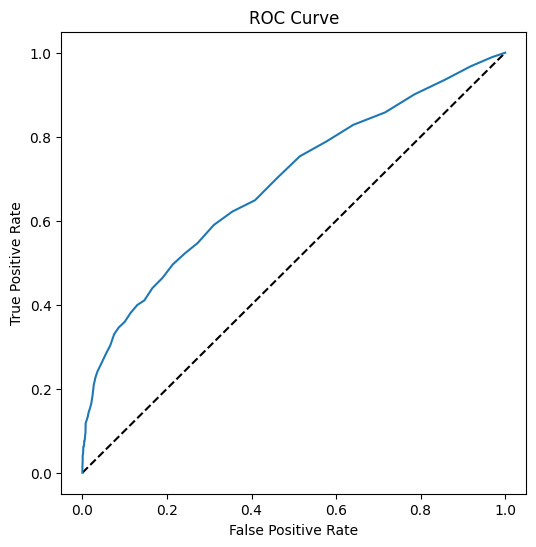

In [141]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(classification_report(y_test, y_pred_RF))

print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Looking at the true negatives, we have 3276. This is great!

Looking at the false negatives, 357 is too high but better than Logistic Model.

Looking at false positives, we can see there are only , quite good.

With the true positives, we correctly identify 16 which is very poor.

Looking at the accuracy score, this is very misleading, looking at the precision score and recall score, this shows us a score of 0.84 which is not bad, but could be improved. However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

The AUC is better a little bit comparing with Logistic Regression

## **Feature Selection**

In [144]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

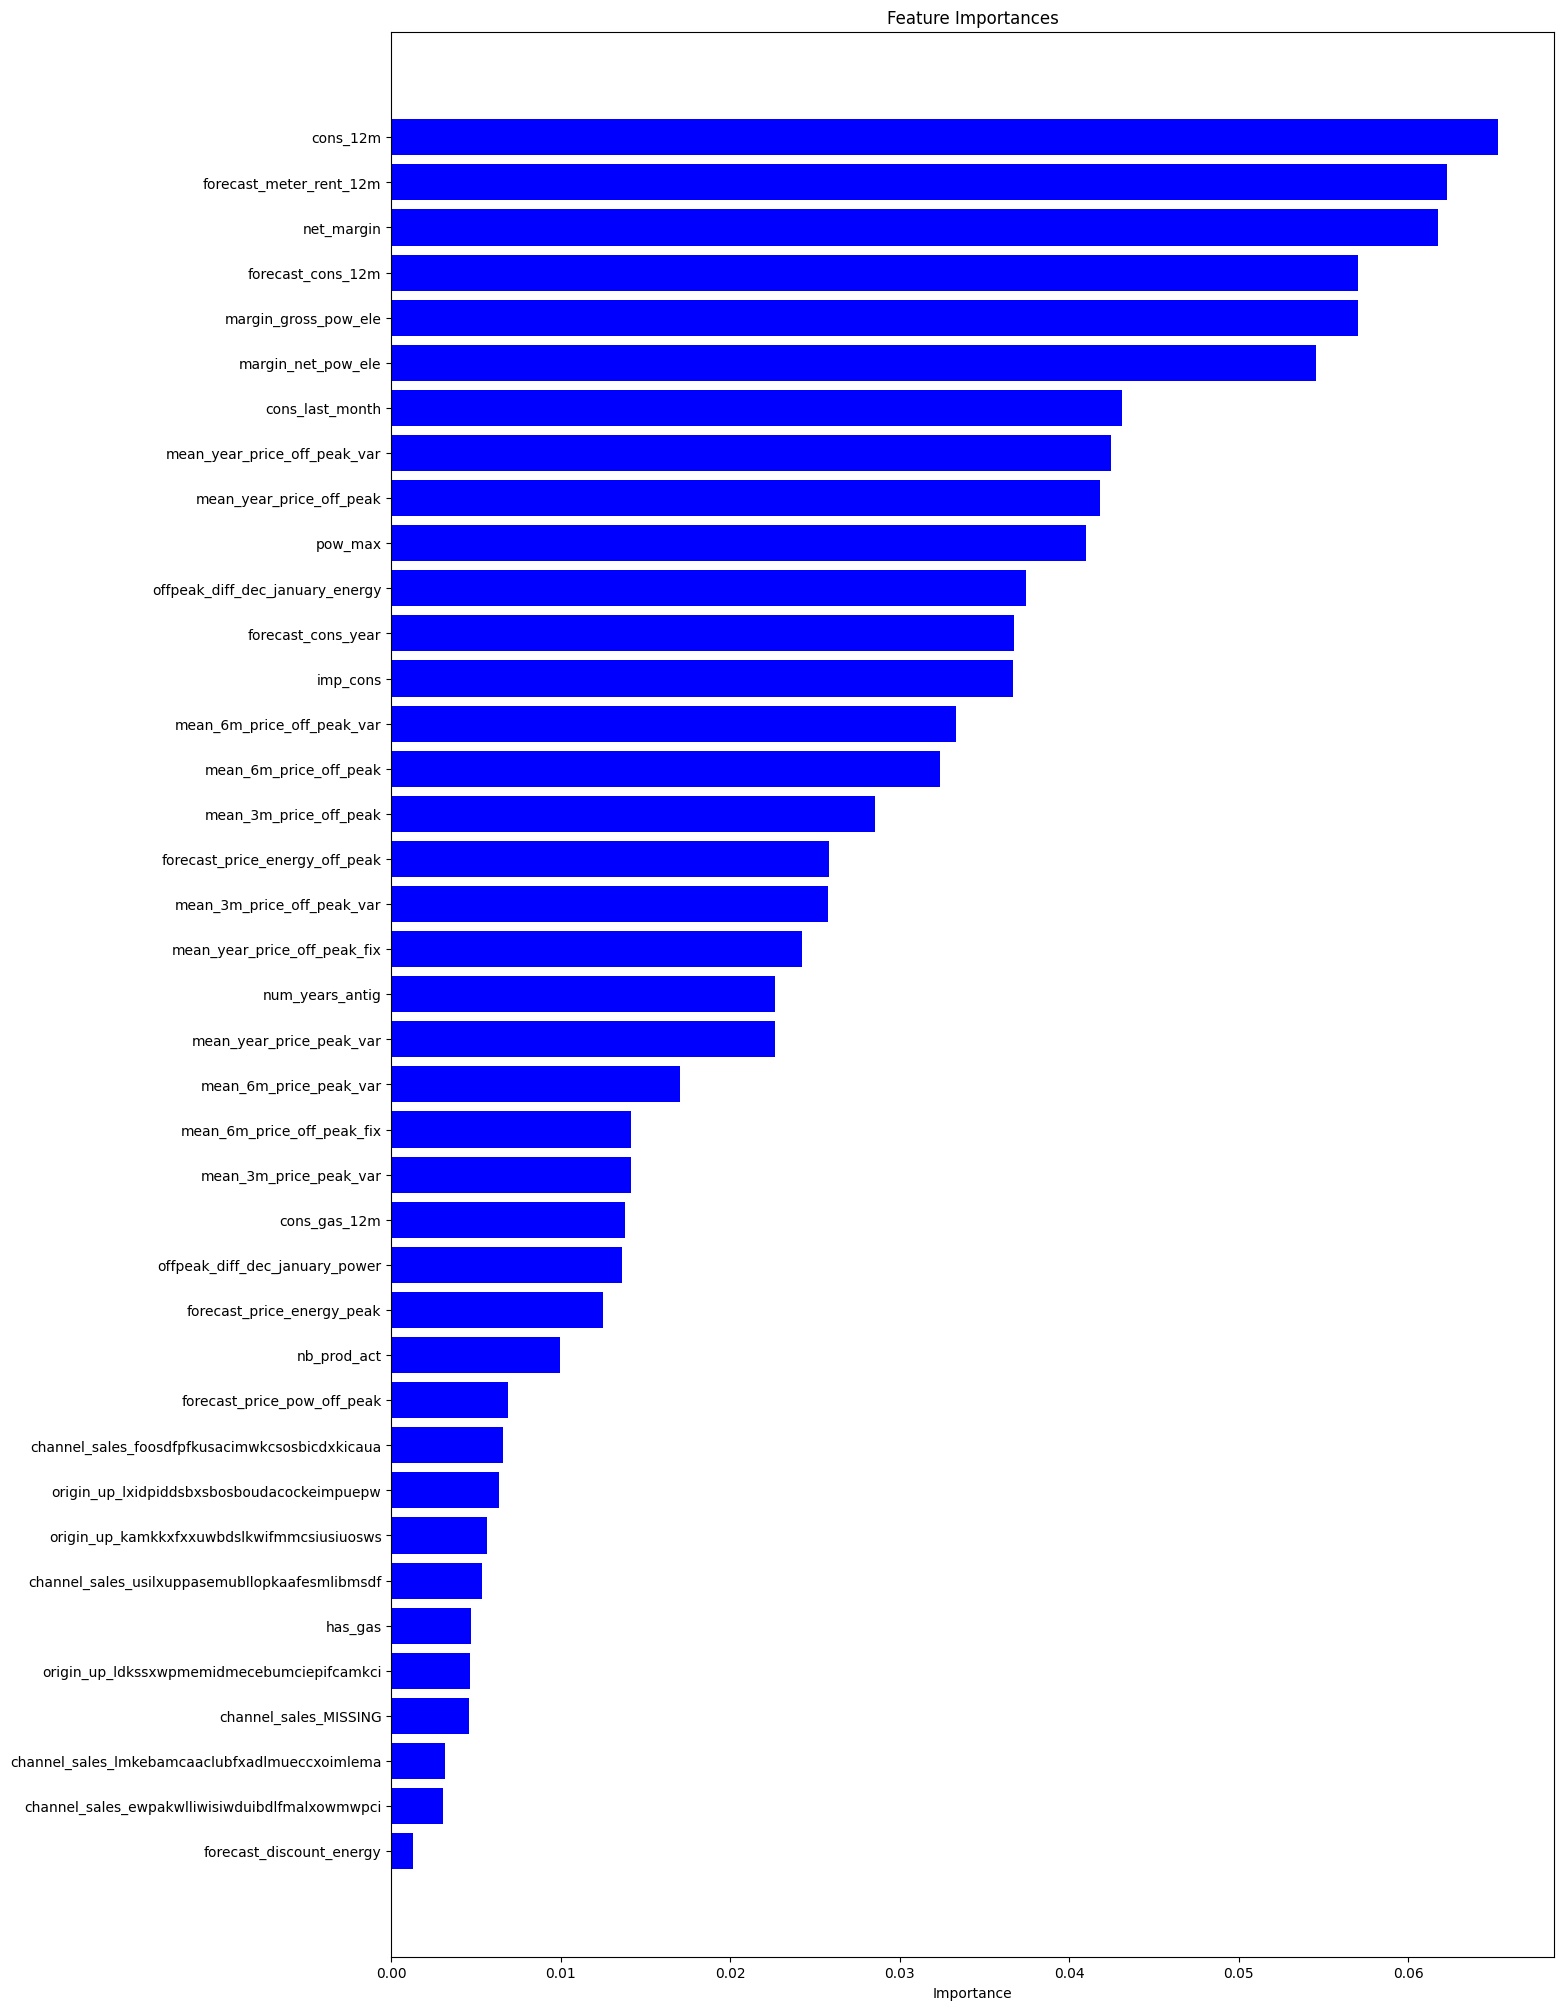

In [145]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

From this chart, we can observe the following points:

* Net margin and consumption over 12 months is a top driver for churn in this model

* Margin on power subscription also is an influential driver
Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract

* The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it

* Our price sensitivity features are scattered around but are not the main driver for a customer churning

The last observation is important because this relates back to our original hypothesis:

> Is churn driven by the customers' price sensitivity?
  
>Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

# Creation of module

In [99]:
df_pred=pd.read_csv('BCG_FEngg.csv')
df_pred.drop(columns = 'Unnamed: 0', inplace=True)

In [100]:
X=df_pred[['margin_net_pow_ele',
'forecast_cons_12m','forecast_meter_rent_12m',
'net_margin','cons_12m']]
y=df_pred['churn']

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [102]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 5)
(10953,)
(3652, 5)
(3652,)


In [103]:
model = RandomForestClassifier(
    n_estimators=100
)
model.fit(X_train, y_train)

RandomForestClassifier()

In [104]:
y_pred=model.predict(X_test)

In [84]:
X_test=pd.DataFrame(X_test).reset_index(drop=True)
y_pred=pd.DataFrame(y_pred)
df_out=pd.merge(X_test, y_pred, left_index=True, right_index=True, how='outer')

In [85]:
df_out.to_csv('output.csv')

In [119]:
import joblib
joblib.dump(model,'random_forest.mt')

['random_forest.mt']